In [1]:
%pylab --no-import-all
%matplotlib inline
from sacla import *

Using matplotlib backend: agg
Populating the interactive namespace from numpy and matplotlib


In [2]:
import idi.reconstruction as recon

In [3]:
l=log('2019 SACLA - Shotlog.csv')

In [4]:
import pandas as pd
pd.set_option('display.max_rows', 1000)

In [5]:
l

,Run start,last run,Starttime,Endtime,Sample,E_ph,Pre Comment,Pulse Energy,Detector Filter,Beamline filter,...,Sx speed,Sz min,Sz max,Sz spacing,Single_x,Single_y,Single_z,Prof_Y,Prof_X2,Prof_Z1
,#,#,Time,Time,#/desc,keV,desc,uJ,desc,mm Silicon,...,pulse/sec,pulses,pulses,pulses,microns,microns,microns,microns,microns,microns
0,781931,NaN,05:47:29,NaN,1,10.4,NaN,562.0,50um Zink,0.3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,781932,781952.0,09:20:14,09:29:08,15,10.4,background,570.0,50um Zink,0.4,...,1200.0,-10000.0,10000.0,80.0,6182.0,-5897.0,1500.0,3715.0,-1100.0,NaN
2,781953,781959.0,09:30:16,09:31:57,15,10.4,NaN,570.0,50um Zink,0.3,...,1200.0,-10000.0,10000.0,80.0,6182.0,-5897.0,1500.0,3715.0,-1100.0,NaN
3,781960,781965.0,09:35:57,09:31:57,15,10.4,NaN,570.0,50um Zink,0.4,...,3600.0,-3000.0,10000.0,80.0,6182.0,-5897.0,1500.0,3715.0,-1100.0,NaN
4,781966,781975.0,09:39:18,09:42:37,15,10.4,NaN,570.0,50um Zink,0.5,...,1200.0,-3000.0,10000.0,80.0,6182.0,-5897.0,1500.0,3715.0,-1100.0,NaN
5,781976,781985.0,09:50:41,09:42:37,22x17 empty,10.4,empty 22x17 window,570.0,50um Zink,0.3,...,1200.0,-3000.0,10000.0,80.0,6182.0,-5897.0,1500.0,3715.0,-1100.0,NaN
6,781976,781985.0,09:50:41,09:42:37,none,10.4,NaN,570.0,50um Zink,0.3,...,1200.0,-3000.0,10000.0,80.0,6182.0,-5897.0,1500.0,3715.0,-1100.0,NaN
7,781976,781985.0,09:50:41,09:42:37,none,10.4,Stephan shielded from air scattering after tar...,570.0,50um Zink,0.3,...,1200.0,-3000.0,10000.0,80.0,6182.0,-5897.0,1500.0,3715.0,-1100.0,NaN
8,781976,781985.0,09:50:41,09:42:37,none,10.4,Tais shieded detector from upstream,570.0,50um Zink,0.3,...,1200.0,-3000.0,10000.0,80.0,6182.0,-5897.0,1500.0,3715.0,-1100.0,NaN


In [6]:
#to run: 97, 82, 83, 84, 87, 88, 93, 94
samples=[
    '10 mid',
    '51, 10 high',
    '10 agar',
    '10 low',
    '5 mid',
    '20 mid',
    '5 high',
    '20nm high',
    'Fe Foil'
]

In [7]:
import glob
import os
def getlatest(search_dir=".",pattern='*',n=1):
    files = list(filter(os.path.isfile, glob.glob(search_dir +'/'+ pattern)))
    files = sorted(files,key=os.path.getmtime,reverse=True)[:n]
    if len(files)==1: return files[0]
    if len(files)==0: return None
    else: return tuple(files)

In [8]:
def append(dictionary,key,value):
    if not key in dictionary:
        dictionary[key]=[]
    dictionary[key].append(value)

In [10]:
import gc
results={}

def append(dictionary,key,value):
    if not key in dictionary:
        dictionary[key]=[]
    dictionary[key].append(value)
def submit(r):
    runstart=int((r['Run start'][0]))
    runend=int(r['last run'][0])
    run=str(r.name)
    allres=dict()
    for cr in range(runstart,runend+1):
        filename=getlatest('/work/gorkhover/zimmf/norm/',f'{run}-{cr}-*',n=1)

        if filename is None: 
            print(r.name,cr,filename,'not found')
            continue
        print(r.name,cr,filename)
        try:
            file=np.load(filename)
            for k,v in file.items():
                if '3d' in k: continue
                print(k,end=' ')
                append(allres,k,v)
        except:
            print(f'error in {filename}')
        gc.collect()
    allres={k:np.array(v) for k,v in allres.items()}
    np.savez_compressed(f'/work/gorkhover/zimmf/norm/{run}_merged2.npz',**allres)
    print(run,'saved')
for sample in samples:
    runs=l.search('Sample',sample)
    isatt=np.array(runs['Beamline filter']!='0')
    runs=runs[isatt]
    runs.apply(submit,axis=1)

72 782330 /work/gorkhover/zimmf/norm/72-782330-190607-222805.npz
inputfile outpath workpath run simple direct directrad detector energy z photonsthreshold pixelsize maximg allimg normalize allrad workfile outfile mask meanphotons stdphotons maxphotons nphotonsmax nphotonsmin photonsum bg mindist shotmean shotstd Nimg simplerad_all directrad_all simple_mean direct_mean directrad_mean simple_std direct_std directrad_std 72 782331 /work/gorkhover/zimmf/norm/72-782331-190607-222834.npz
inputfile outpath workpath run simple direct directrad detector energy z photonsthreshold pixelsize maximg allimg normalize allrad workfile outfile mask meanphotons stdphotons maxphotons nphotonsmax nphotonsmin photonsum bg mindist shotmean shotstd Nimg simplerad_all directrad_all simple_mean direct_mean directrad_mean simple_std direct_std directrad_std 72 782332 /work/gorkhover/zimmf/norm/72-782332-190607-222805.npz
inputfile outpath workpath run simple direct directrad detector energy z photonsthreshold p

ValueError: ("invalid literal for int() with base 10: 'skip'", 'occurred at index 81')

60804

In [ ]:
1

In [10]:
for sample in samples:
    runs=l.search('Sample',sample)
    isatt=np.array(runs['Beamline filter']!='0')
    runs=runs[isatt]
    print(sample, end=': ')
    runs.apply(lambda r: print(r.name),axis=1)

10 mid: 87
51, 10 high: 82
10 agar: 97
10 low: 93
5 mid: 89
20 mid: 91
5 high: 85
20nm high: 72
73
74
Fe Foil: 79
80
81


In [11]:
merged=np.load('/work/gorkhover/zimmf/norm/82_merged.npz',allow_pickle=True)

In [12]:
list(merged.keys())

['inputfile',
 'outpath',
 'workpath',
 'run',
 'simple',
 'direct',
 'directrad',
 'detector',
 'energy',
 'z',
 'photonsthreshold',
 'pixelsize',
 'maximg',
 'allimg',
 'normalize',
 'allrad',
 'workfile',
 'outfile',
 'mask',
 'meanphotons',
 'stdphotons',
 'maxphotons',
 'nphotonsmax',
 'nphotonsmin',
 'photonsum',
 'bg',
 'mindist',
 'shotmean',
 'shotstd',
 'Nimg',
 'simplerad_all',
 'directrad_all',
 'simple_mean',
 'direct_mean',
 'directrad_mean',
 'simple_std',
 'direct_std',
 'directrad_std']

In [86]:
#nphotonsmax,nphotonsmin,photonsum=merged['nphotonsmax'],merged['nphotonsmin'],merged['photonsum']

In [14]:
!ls /work/gorkhover/zimmf/norm/*_merged2.npz

/work/gorkhover/zimmf/norm/72_merged2.npz
/work/gorkhover/zimmf/norm/73_merged2.npz
/work/gorkhover/zimmf/norm/82_merged2.npz
/work/gorkhover/zimmf/norm/87_merged2.npz
/work/gorkhover/zimmf/norm/89_merged2.npz
/work/gorkhover/zimmf/norm/91_merged2.npz
/work/gorkhover/zimmf/norm/93_merged2.npz
/work/gorkhover/zimmf/norm/97_merged2.npz


In [42]:
merged0=np.load('/work/gorkhover/zimmf/norm/80_merged2.npz',allow_pickle=True)
mask0=merged0['mask'][2,...]
import idi.reconstruction as recon
import idi.util as util
simplenorm0=recon.simple.corr(mask0)
simplemean0=merged0['simple_mean'][2,...]

In [43]:
t=(simplemean0/simplenorm0)

/home/gorkhover/anaconda3/envs/zimmf/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in true_divide
  """Entry point for launching an IPython kernel.


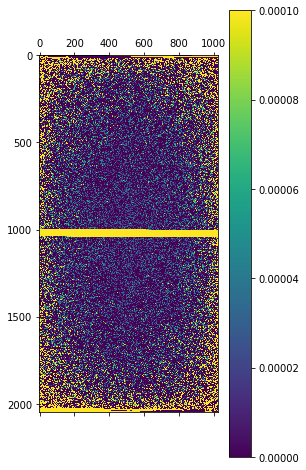

In [44]:
plt.matshow(t,vmin=0,vmax=0.0001)
plt.colorbar()

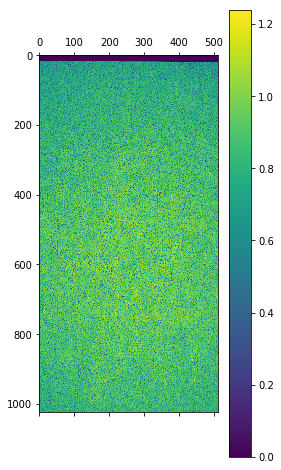

In [48]:
c=merged0['meanphotons'][2]
plt.matshow(c)
plt.colorbar()

/home/gorkhover/anaconda3/envs/zimmf/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in log
  """Entry point for launching an IPython kernel.


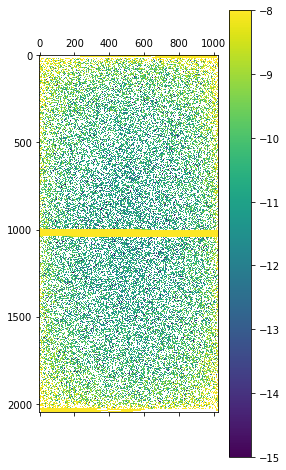

In [28]:
plt.matshow(np.log(t),vmax=-8,vmin=-15)
plt.colorbar()

In [13]:
merged0=np.load('/work/gorkhover/zimmf/norm/80_merged2.npz',allow_pickle=True)
mask0=merged0['mask'][0,...]
import idi.reconstruction as recon
import idi.util as util
f=recon.newrad.corrfunction(mask0.shape,0.1/50e-6,100)
norm0=f(mask0)

simplenorm0=recon.simple.corr(mask0)
simplenorm0=util.radial_profile(simplenorm0,np.array(simplenorm0.shape)//2)

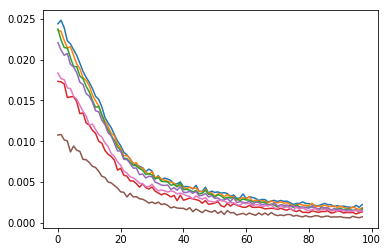

In [28]:
for n,r in enumerate(merged0['simplerad_all'][0]):
    plt.plot((r/simplenorm0)[2:100])
    if n>5: break

In [30]:
merged10=np.load('/work/gorkhover/zimmf/norm/82_merged2.npz',allow_pickle=True)
mask10=merged10['mask'][0,...]

simplenorm10=recon.simple.corr(mask10)
simplenorm10=util.radial_profile(simplenorm10,np.array(simplenorm10.shape)//2)

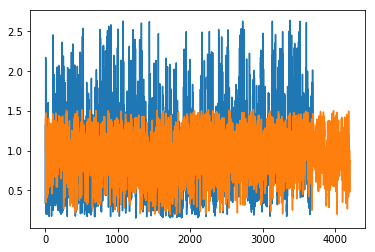

In [48]:
plt.plot(merged10['shotmean'][0])
plt.plot(merged0['shotmean'][0])

(1146,)
(1146,)
(1146,)
(1146,)
(1146,)
(1146,)
(1146,)
(1146,)
(1146,)
(1146,)
(1146,)
(1146,)
(1146,)
(1146,)
(1146,)
(1146,)
(1146,)
(1146,)
(1146,)
(1146,)
(1146,)
(1146,)


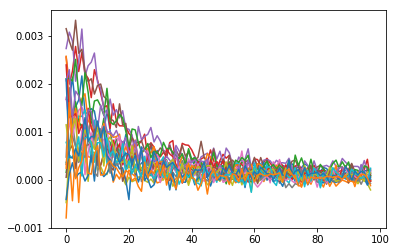

In [49]:
for n,r in enumerate(merged10['simplerad_all'][0]):
    print(r.shape)
    plt.plot((r/simplenorm10)[2:100])
    if n>20: break

In [50]:
new=np.load('/work/gorkhover/zimmf/new/82-782398-190530-025840.npz')

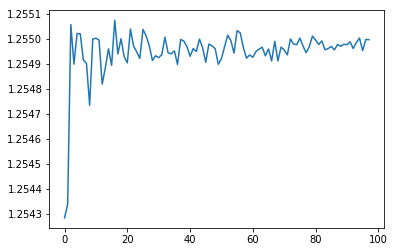

In [66]:
newmask=new['mask']
f=recon.newrad.corrfunction(newmask.shape,0.1/50e-6,100)
newnorm=f(newmask.astype(float))
r=(new['directrad_mean'])
plt.plot((r/newnorm)[2:100])

In [62]:
newmask.shape

(512,)

In [26]:
merged0=np.load('/work/gorkhover/zimmf/norm/80_merged2.npz',allow_pickle=True)
mask0=merged0['mask'][0,...]
import idi.reconstruction as recon
import idi.util as util
f=recon.newrad.corrfunction(mask0.shape,0.1/50e-6,100)
norm0=f(mask0)



(1146,)

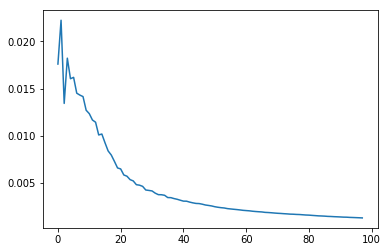

In [185]:

merged0=np.load('/work/gorkhover/zimmf/norm/80_merged2.npz',allow_pickle=True)
dm0=merged0['directrad_mean']
mask0=merged0['mask'][0,...]
import idi.reconstruction as recon
f=recon.newrad.corrfunction(mask0.shape,0.1/50e-6,100)
norm0=f(mask0)
r0=dm0[0,:]/norm0
#r0=r0/(r0[2]) #normalisation
plt.plot(r0[2:])

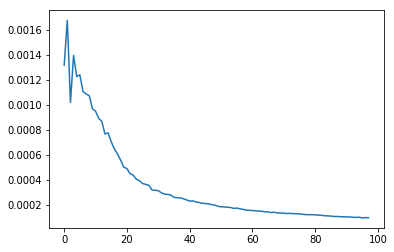

In [184]:
import idi.reconstruction as recon


merged10=np.load('/work/gorkhover/zimmf/norm/82_merged2.npz',allow_pickle=True)
dm10=merged10['directrad_mean']
mask10=merged10['mask'][0,...]
f=recon.newrad.corrfunction(mask.shape,0.1/50e-6,100)
norm10=f(mask10)
r10=dm10[0,:]/norm10
#r10=r10/(r10[2]) #normalisation
plt.plot(r10[2:])

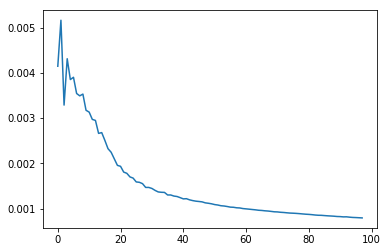

In [192]:
import idi.reconstruction as recon


merged20=np.load('/work/gorkhover/zimmf/norm/72_merged2.npz',allow_pickle=True)
dm20=merged20['directrad_mean']
mask20=merged20['mask'][0,...]
f=recon.newrad.corrfunction(mask20.shape,0.1/50e-6,100)
norm20=f(mask20)
r20=dm20[0,:]/norm20
#r20=r20/(r20[2]) #normalisation
plt.plot(r20[2:])

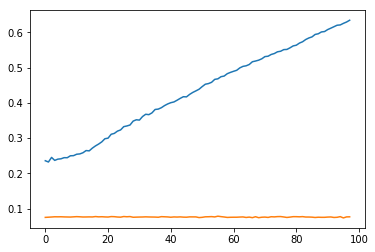

In [196]:
plt.plot((r20/r0)[2:])
plt.plot((r10/r0)[2:])
#plt.plot((r10-r0)[2:])

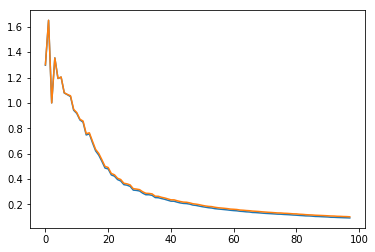

In [172]:
r1=dm1/norm1
r0=dm/norm
r1=(np.mean(r1[:,2:],axis=0))
r0=(np.mean(r0[:,2:],axis=0))
r1=r1/(r1[2])
r0=r0/(r0[2])

plt.plot(r0)
plt.plot(r1)



In [20]:
dm

array([[514217.45911374,   6315.38281268,   4723.74266939, ...,
         12535.66097687,  12977.58972383,  12945.25203191],
       [514375.24480165,   7213.70370649,   5777.30044338, ...,
         15367.40654148,  15753.55038442,  15431.60974057],
       [514300.99938021,   6806.72624079,   5329.6128654 , ...,
         14473.36159192,  14437.45718636,  14393.62813134],
       ...,
       [514708.35555989,   8878.58202426,   7746.48378954, ...,
         21428.87676304,  21098.83921565,  21156.35684817],
       [514746.65732159,   9081.54170381,   7938.46961729, ...,
         22187.68999725,  21733.54623803,  21663.48782084],
       [514465.46668786,   7529.36570635,   6083.49608517, ...,
         16635.16477989,  16831.72353408,  16890.38973608]])

In [9]:
!ls /work/gorkhover/zimmf/norm/*merged*.npz

/work/gorkhover/zimmf/norm/72_merged2.npz
/work/gorkhover/zimmf/norm/73_merged2.npz
/work/gorkhover/zimmf/norm/74_merged2.npz
/work/gorkhover/zimmf/norm/79_merged2.npz
/work/gorkhover/zimmf/norm/80_merged2.npz
/work/gorkhover/zimmf/norm/82_merged2.npz
/work/gorkhover/zimmf/norm/82_merged.npz
/work/gorkhover/zimmf/norm/87_merged2.npz
/work/gorkhover/zimmf/norm/87_merged.npz
/work/gorkhover/zimmf/norm/89_merged2.npz
/work/gorkhover/zimmf/norm/89_merged.npz
/work/gorkhover/zimmf/norm/91_merged2.npz
/work/gorkhover/zimmf/norm/91_merged.npz
/work/gorkhover/zimmf/norm/93_merged2.npz
/work/gorkhover/zimmf/norm/93_merged.npz
/work/gorkhover/zimmf/norm/97_merged2.npz
/work/gorkhover/zimmf/norm/97_merged.npz


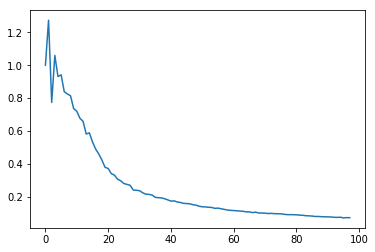

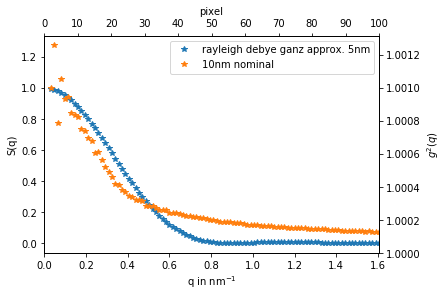

In [154]:

import scipy.special

def rdg(q,r,a=1,b=0):
    '''
    rayleigh debye ganz approximation for scattering of a sphere.
    returns a*P+b
    '''
    j1=lambda x: scipy.special.spherical_jn(1, x)
    q=np.clip(q, 1e-100, None) #avoid singularity at q==0 to allow fitting
    p=(3*j1(q*r)/(q*r))**2
    return a*p+b


e=6400
l=(1239.0/e)*1e-9
pixel=np.arange(0,100)
theta=0.5*np.arctan2(pixel*50e-6,0.1)
q=(2*np.pi/l)*2*np.sin(theta)
I=rdg(q,5e-9)


def profile_plot(I,l,q,f='plot'):
    if f not in ['loglog','semilogy','plot']: raise NotImplementedError(f'function {f} not implemented')
    pixel=list(range(len(q)+9))
    fig = plt.figure()
    ax1 = fig.add_subplot(111)
    pf=getattr(ax1,f)
   
    if not isinstance(I,list): I=[I]
    if not isinstance(l,list): l=[l]
    for i,l in zip(I,l):  
        pf(q/1e9,i,'*',label=l)
    ax1.set_xlabel(r"q in nm$^{-1}$")
   

    if not 'loglog' in f:

        ax1.set_xlim((0,np.max(q)/1e9))
        ax1.set_ylabel('S(q)')       
        ax2 = ax1.twiny()
        ax3 = ax1.twinx()
        ax3.set_ylim((1,1+1/760))
        ax3.set_ylabel(r'$g^2(q)$')
        ax2.set_xlabel(r"pixel")
        ax2.set_xlim(ax1.get_xlim())
        ax2.set_xticks((pixel[::10]/np.max(pixel)*np.max(q)))
        ax2.set_xticklabels(pixel[::10])
    ax1.legend()
    plt.savefig('run82-1.png')
    plt.show()
    
profile_plot([I[2:],r[2:]],['rayleigh debye ganz approx. 5nm',r'10nm nominal'],q[2:])

In [155]:
!pwd

/home/gorkhover/zimmf


In [140]:
r=dm[0,:]/norm

In [142]:
1/r[2]

758.1166567784941

In [94]:
for ps,nmax,nmin in zip(photonsum,nphotonsmax,nphotonsmin):
    ok=np.logical_and(ps>nmin,ps<nmax)
    print(np.sum(ok))

3734
3768
3790
3801
3797
3772
3772
3053
2764
3790
3819
3824
3826
3815
3811
2452


In [69]:
t=merged['directrad_mean'],mask=merged['mask']

In [70]:
std=merged['directrad_std'][1]

In [71]:
f=recon.newrad.corrfunction(mask.shape,0.1/50e-6,100)

In [72]:
norm=f(mask)

In [84]:
w=np.hanning(8)
w=w/np.sum(w)

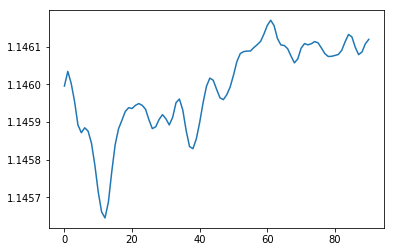

In [85]:
plt.plot(np.convolve((t/norm)[2:100],w,mode='valid'))

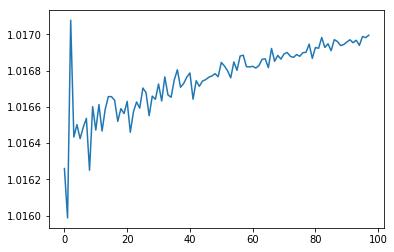

In [65]:
plt.plot((std/norm)[2:])

In [16]:
mean=np.nanmean(np.array(res),axis=0)

In [17]:
np.nanmin(mean[600:-600,300:-300])

1.1669560183208267

In [19]:
np.nanmedian(mean[600:-600,300:-300])

1.1692600428447295

In [42]:
plt.rcParams['figure.figsize']=(15,15)
def plot(img):
    cimg=img[900:-900,400:-400]
    vmin=np.percentile(img,20)
    vmax=np.percentile(img,90)
    plt.matshow(img,vmin=vmin,vmax=vmax)
    plt.show()

In [15]:
from idi.util import radial_profile

10 mid
0 1 2 3 

/home/gorkhover/anaconda3/envs/zimmf/lib/python3.7/site-packages/ipykernel_launcher.py:12: RuntimeWarning: divide by zero encountered in true_divide
  if sys.path[0] == '':


4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 plot:


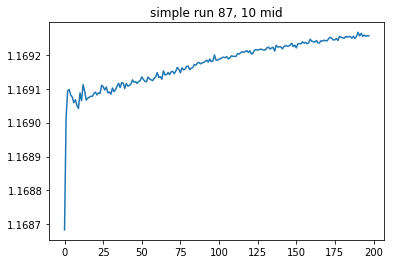

10 low
0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 plot:


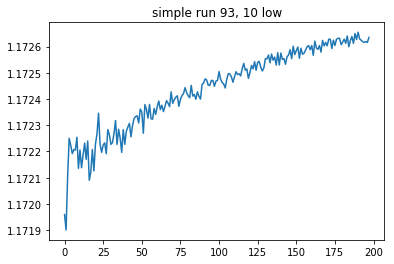

51, 10 high
0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 0 1 2 3 4 5 6 7 8 9 10 11 12 

/home/gorkhover/anaconda3/envs/zimmf/lib/python3.7/site-packages/ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in add
  from ipykernel import kernelapp as app


13 14 15 16 17 18 19 20 plot:


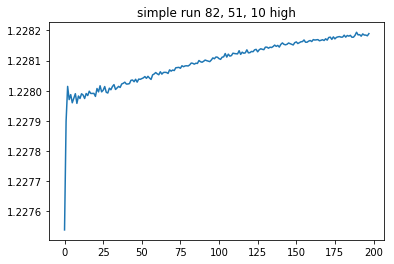

10 agar
0 1 2 3 4 5 6 7 8 9 10 11 12 13 0 1 2 3 4 5 6 7 8 9 10 11 12 13 plot:


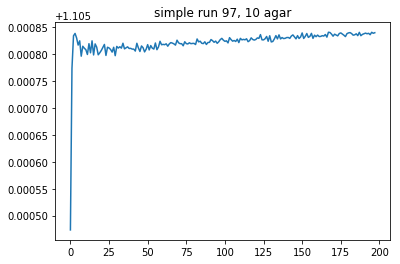

5 mid
0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 

MemoryError: occurred at index 89

In [109]:
res={}
rad={}
def plot(run):
    nr=run.name
    sample=(run['Sample'].iloc[0])
    merged=np.load(f'/work/gorkhover/zimmf/more/{nr}_merged.npz',allow_pickle=True)
    res[nr]=[]
    
    for i,(m,s) in enumerate(zip(merged['mask'],merged['simple_mean'])):
        print(i, end=' ')
        
        norm=recon.simple.corr(m)
        res[nr].append(s/norm)
    rad[nr]=0
    for i,r in enumerate(res[nr]):
        rad[nr]+=radial_profile(r,np.array(r.shape)//2)
        print(i, end=' ')
    print('plot:')
    rad[nr]=rad[nr]/(i+1)
    plt.plot(rad[nr][2:200])
    plt.title(f'simple run {nr}, {sample}')
    plt.show()





for sample in samples:
    runs=l.search('Sample',sample)
    isatt=np.array(runs['Beamline filter']!='0')
    runs=runs[isatt]
    print(sample)
    runs.apply(plot,axis=1)


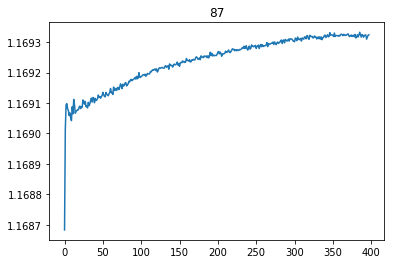

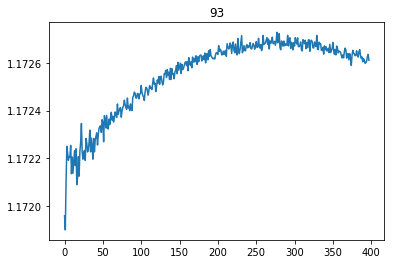

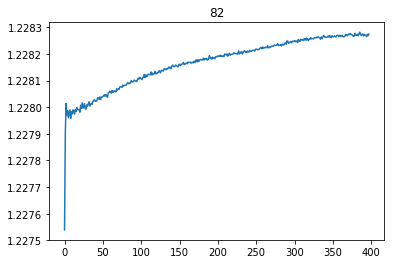

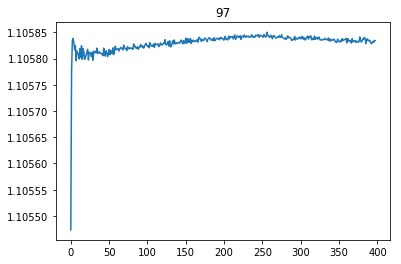

In [117]:
for n,r in rad.items():
    plt.plot(r[2:400],label=n)
    plt.title(n)
    ax = plt.gca()
    ax.ticklabel_format(useOffset=False)
    plt.show()

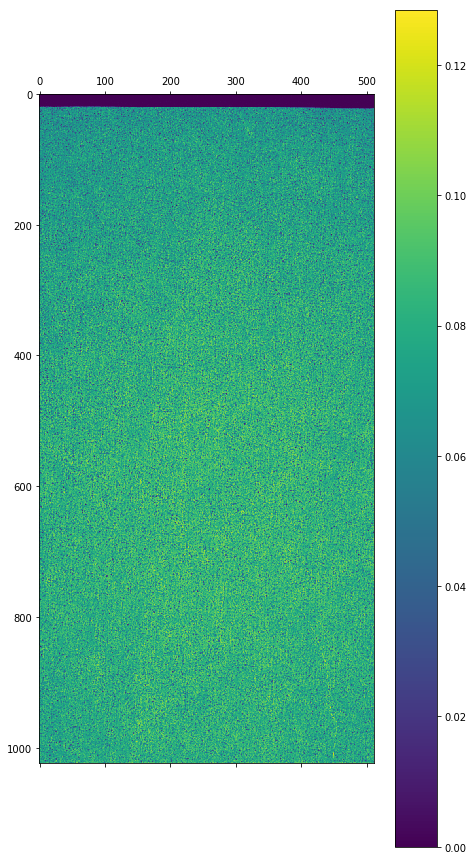

In [38]:
plt.matshow(p[0,...])
plt.colorbar()

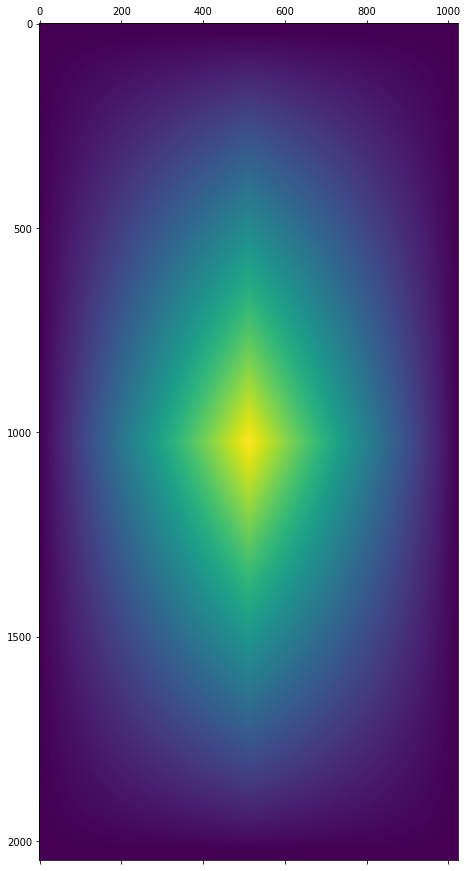

In [43]:
plt.matshow(norm)

In [ ]:
plt.matshow(meanpho)